In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV

from sklearn import tree
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score 
from sklearn.metrics import cohen_kappa_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [2]:
df_credit = pd.read_csv("datos/creditcardmarketing.csv",header = None)

In [3]:
columnas = ["Customer_Number","Offer_Accepted","Reward","Mailer_Type","Income_Level","Bank_Accounts_Open","Overdraft_Protection","Credit_Rating","Credit_Cards_Held","Homes_Owned","Household_Size","Own_Your_Home","Q1","Q2","Q3","Q4","Balance"]

In [4]:
df_credit.columns = columnas

EDA

In [5]:
df_credit

,Customer_Number,Offer_Accepted,Reward,Mailer_Type,Income_Level,Bank_Accounts_Open,Overdraft_Protection,Credit_Rating,Credit_Cards_Held,Homes_Owned,Household_Size,Own_Your_Home,Q1,Q2,Q3,Q4,Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,17996,No,Cash Back,Letter,High,1,No,Low,1,1,5,Yes,167.50,136.0,65.0,71.0,398.0
17996,17997,No,Cash Back,Letter,High,1,No,Low,3,1,3,Yes,850.50,984.0,940.0,943.0,535.0
17997,17998,No,Cash Back,Letter,High,1,No,Low,2,1,4,No,1087.25,918.0,767.0,1170.0,1494.0
17998,17999,No,Cash Back,Letter,Medium,1,No,Medium,4,2,2,Yes,1022.25,626.0,983.0,865.0,1615.0


In [6]:
df_credit_no = df_credit[df_credit["Offer_Accepted"] == "No"]
df_credit_no["Offer_Accepted"].count()

16977

In [7]:
df_credit_si = df_credit[df_credit["Offer_Accepted"] == "Yes"]
df_credit_si["Offer_Accepted"].count()

1023

In [8]:
df_credit_si

,Customer_Number,Offer_Accepted,Reward,Mailer_Type,Income_Level,Bank_Accounts_Open,Overdraft_Protection,Credit_Rating,Credit_Cards_Held,Homes_Owned,Household_Size,Own_Your_Home,Q1,Q2,Q3,Q4,Balance
27,28,Yes,Air Miles,Letter,Medium,1,No,Low,1,1,2,No,769.50,54.0,515.0,1204.0,1305.0
45,46,Yes,Air Miles,Postcard,High,1,Yes,Low,2,1,5,Yes,851.25,206.0,467.0,1744.0,988.0
50,51,Yes,Air Miles,Postcard,Low,1,No,High,2,1,2,Yes,931.75,1536.0,1232.0,597.0,362.0
57,58,Yes,Air Miles,Postcard,Low,1,No,Medium,1,1,2,Yes,1192.75,1787.0,908.0,1343.0,733.0
74,75,Yes,Cash Back,Postcard,High,1,No,Low,2,2,5,Yes,1329.50,1073.0,1127.0,1603.0,1515.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17940,17941,Yes,Air Miles,Postcard,Medium,1,Yes,Low,2,1,4,Yes,1140.25,634.0,1076.0,1966.0,885.0
17942,17943,Yes,Air Miles,Postcard,Low,1,No,Medium,1,1,3,Yes,1026.25,297.0,1672.0,1569.0,567.0
17971,17972,Yes,Cash Back,Postcard,Low,1,No,High,2,2,4,Yes,1221.75,2118.0,1632.0,1029.0,108.0
17984,17985,Yes,Points,Postcard,High,1,No,Low,2,1,2,No,977.25,1628.0,1025.0,885.0,371.0


In [9]:
df_credit.isnull().sum()

Customer_Number          0
Offer_Accepted           0
Reward                   0
Mailer_Type              0
Income_Level             0
Bank_Accounts_Open       0
Overdraft_Protection     0
Credit_Rating            0
Credit_Cards_Held        0
Homes_Owned              0
Household_Size           0
Own_Your_Home            0
Q1                      24
Q2                      24
Q3                      24
Q4                      24
Balance                 24
dtype: int64

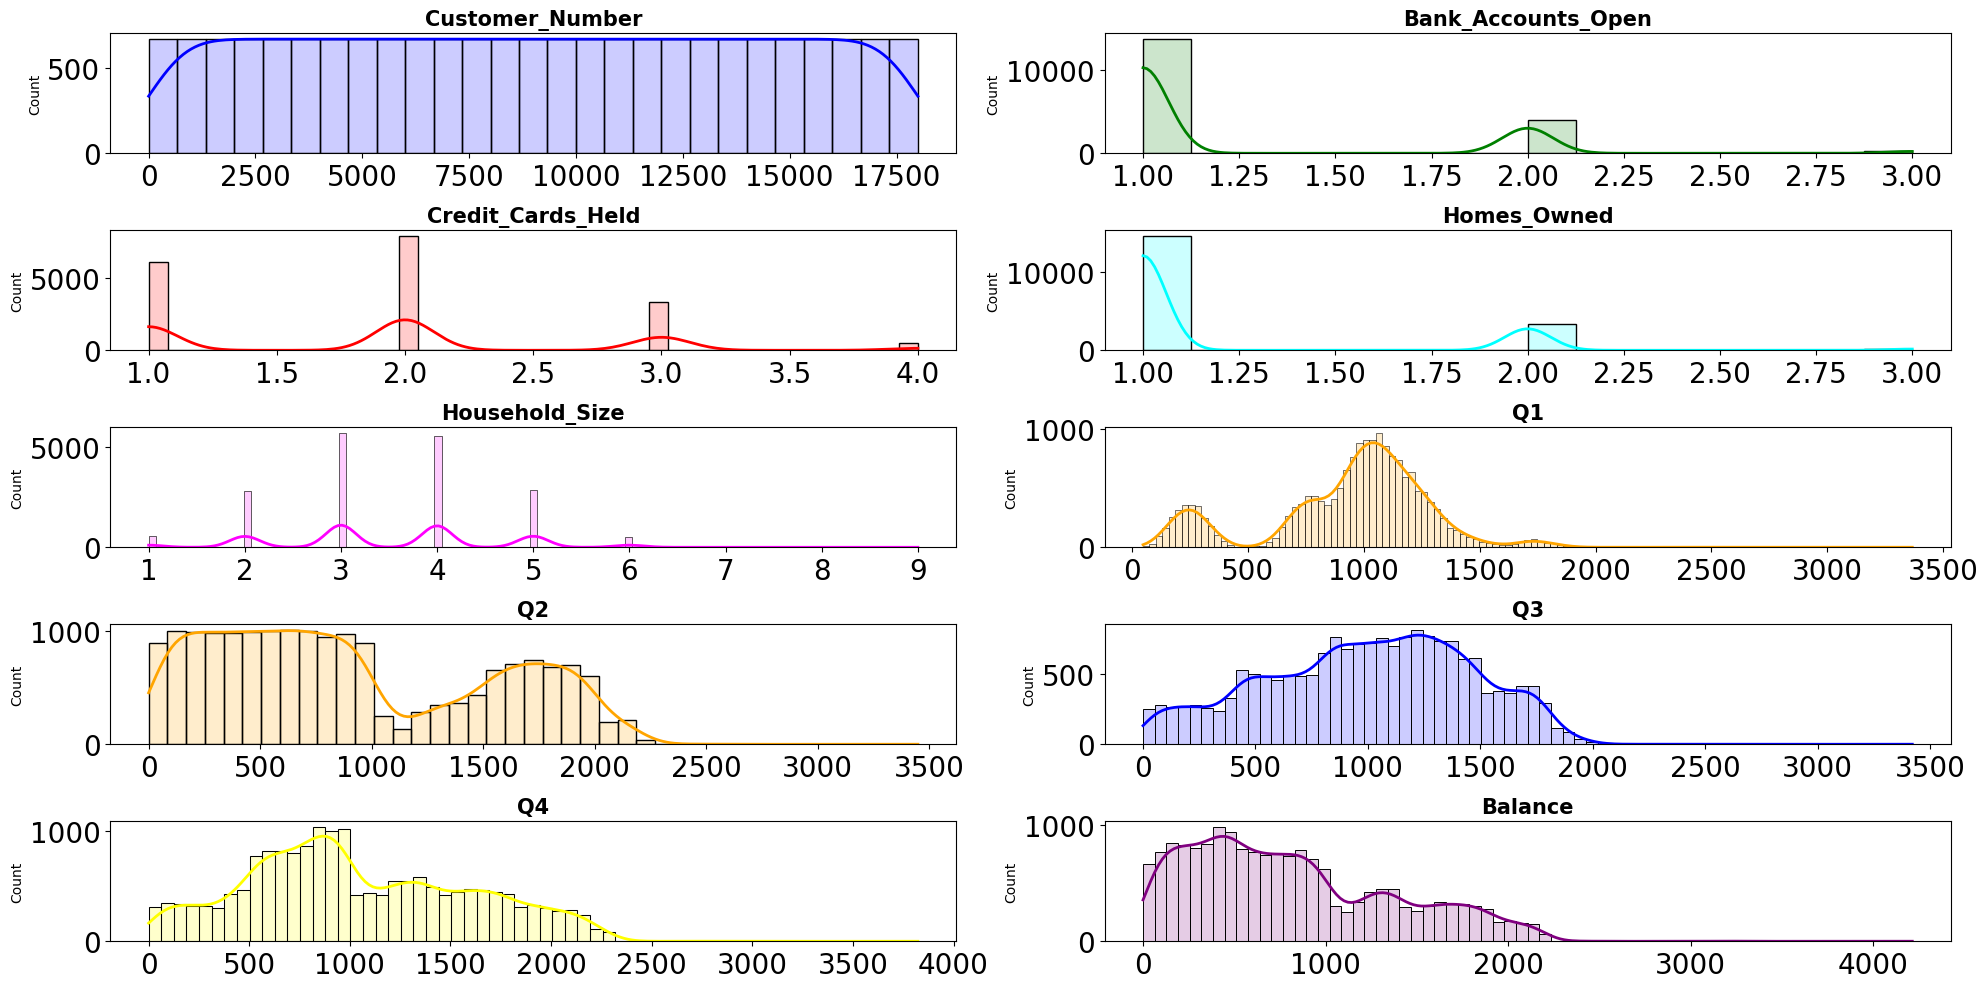

In [10]:
fig, axes = plt.subplots(nrows = 5, ncols = 2, figsize = (20, 10))

lista_colores = ["blue", "green", "red", "cyan", "magenta", "orange","orange","blue","yellow","purple"]

axes = axes.flat

columnas_numeric = df_credit.select_dtypes(include = np.number).columns

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df_credit,
        x = colum,
        kde = True, 
        color = lista_colores[i], 
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    

fig.tight_layout();

In [11]:
aceptado = df_credit["Offer_Accepted"].value_counts()
aceptado

No     16977
Yes     1023
Name: Offer_Accepted, dtype: int64

In [12]:
df_credit_categoric = df_credit.drop(["Q1","Q2","Q3","Q4","Balance","Customer_Number"],axis=1)
df_credit_categoric

,Offer_Accepted,Reward,Mailer_Type,Income_Level,Bank_Accounts_Open,Overdraft_Protection,Credit_Rating,Credit_Cards_Held,Homes_Owned,Household_Size,Own_Your_Home
0,No,Air Miles,Letter,High,1,No,High,2,1,4,No
1,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes
2,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes
3,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No
4,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes
...,...,...,...,...,...,...,...,...,...,...,...
17995,No,Cash Back,Letter,High,1,No,Low,1,1,5,Yes
17996,No,Cash Back,Letter,High,1,No,Low,3,1,3,Yes
17997,No,Cash Back,Letter,High,1,No,Low,2,1,4,No
17998,No,Cash Back,Letter,Medium,1,No,Medium,4,2,2,Yes


In [13]:
df_credit.head()

,Customer_Number,Offer_Accepted,Reward,Mailer_Type,Income_Level,Bank_Accounts_Open,Overdraft_Protection,Credit_Rating,Credit_Cards_Held,Homes_Owned,Household_Size,Own_Your_Home,Q1,Q2,Q3,Q4,Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [14]:
df_credit_numeric = df_credit.select_dtypes(include=np.number)
df_credit_numeric = df_credit_numeric.drop(["Customer_Number","Bank_Accounts_Open","Credit_Cards_Held","Homes_Owned","Household_Size"],axis=1)
df_credit_numeric.head()

,Q1,Q2,Q3,Q4,Balance
0,1160.75,1669.0,877.0,1095.0,1002.0
1,147.25,39.0,106.0,78.0,366.0
2,276.50,367.0,352.0,145.0,242.0
3,1219.00,1578.0,1760.0,1119.0,419.0
4,1211.00,2140.0,1357.0,982.0,365.0


In [15]:
df_credit_categoric.head(1)

,Offer_Accepted,Reward,Mailer_Type,Income_Level,Bank_Accounts_Open,Overdraft_Protection,Credit_Rating,Credit_Cards_Held,Homes_Owned,Household_Size,Own_Your_Home
0,No,Air Miles,Letter,High,1,No,High,2,1,4,No


In [16]:
df_credit_numeric.head(1)

,Q1,Q2,Q3,Q4,Balance
0,1160.75,1669.0,877.0,1095.0,1002.0


In [17]:
df_credit.head(1)

,Customer_Number,Offer_Accepted,Reward,Mailer_Type,Income_Level,Bank_Accounts_Open,Overdraft_Protection,Credit_Rating,Credit_Cards_Held,Homes_Owned,Household_Size,Own_Your_Home,Q1,Q2,Q3,Q4,Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0


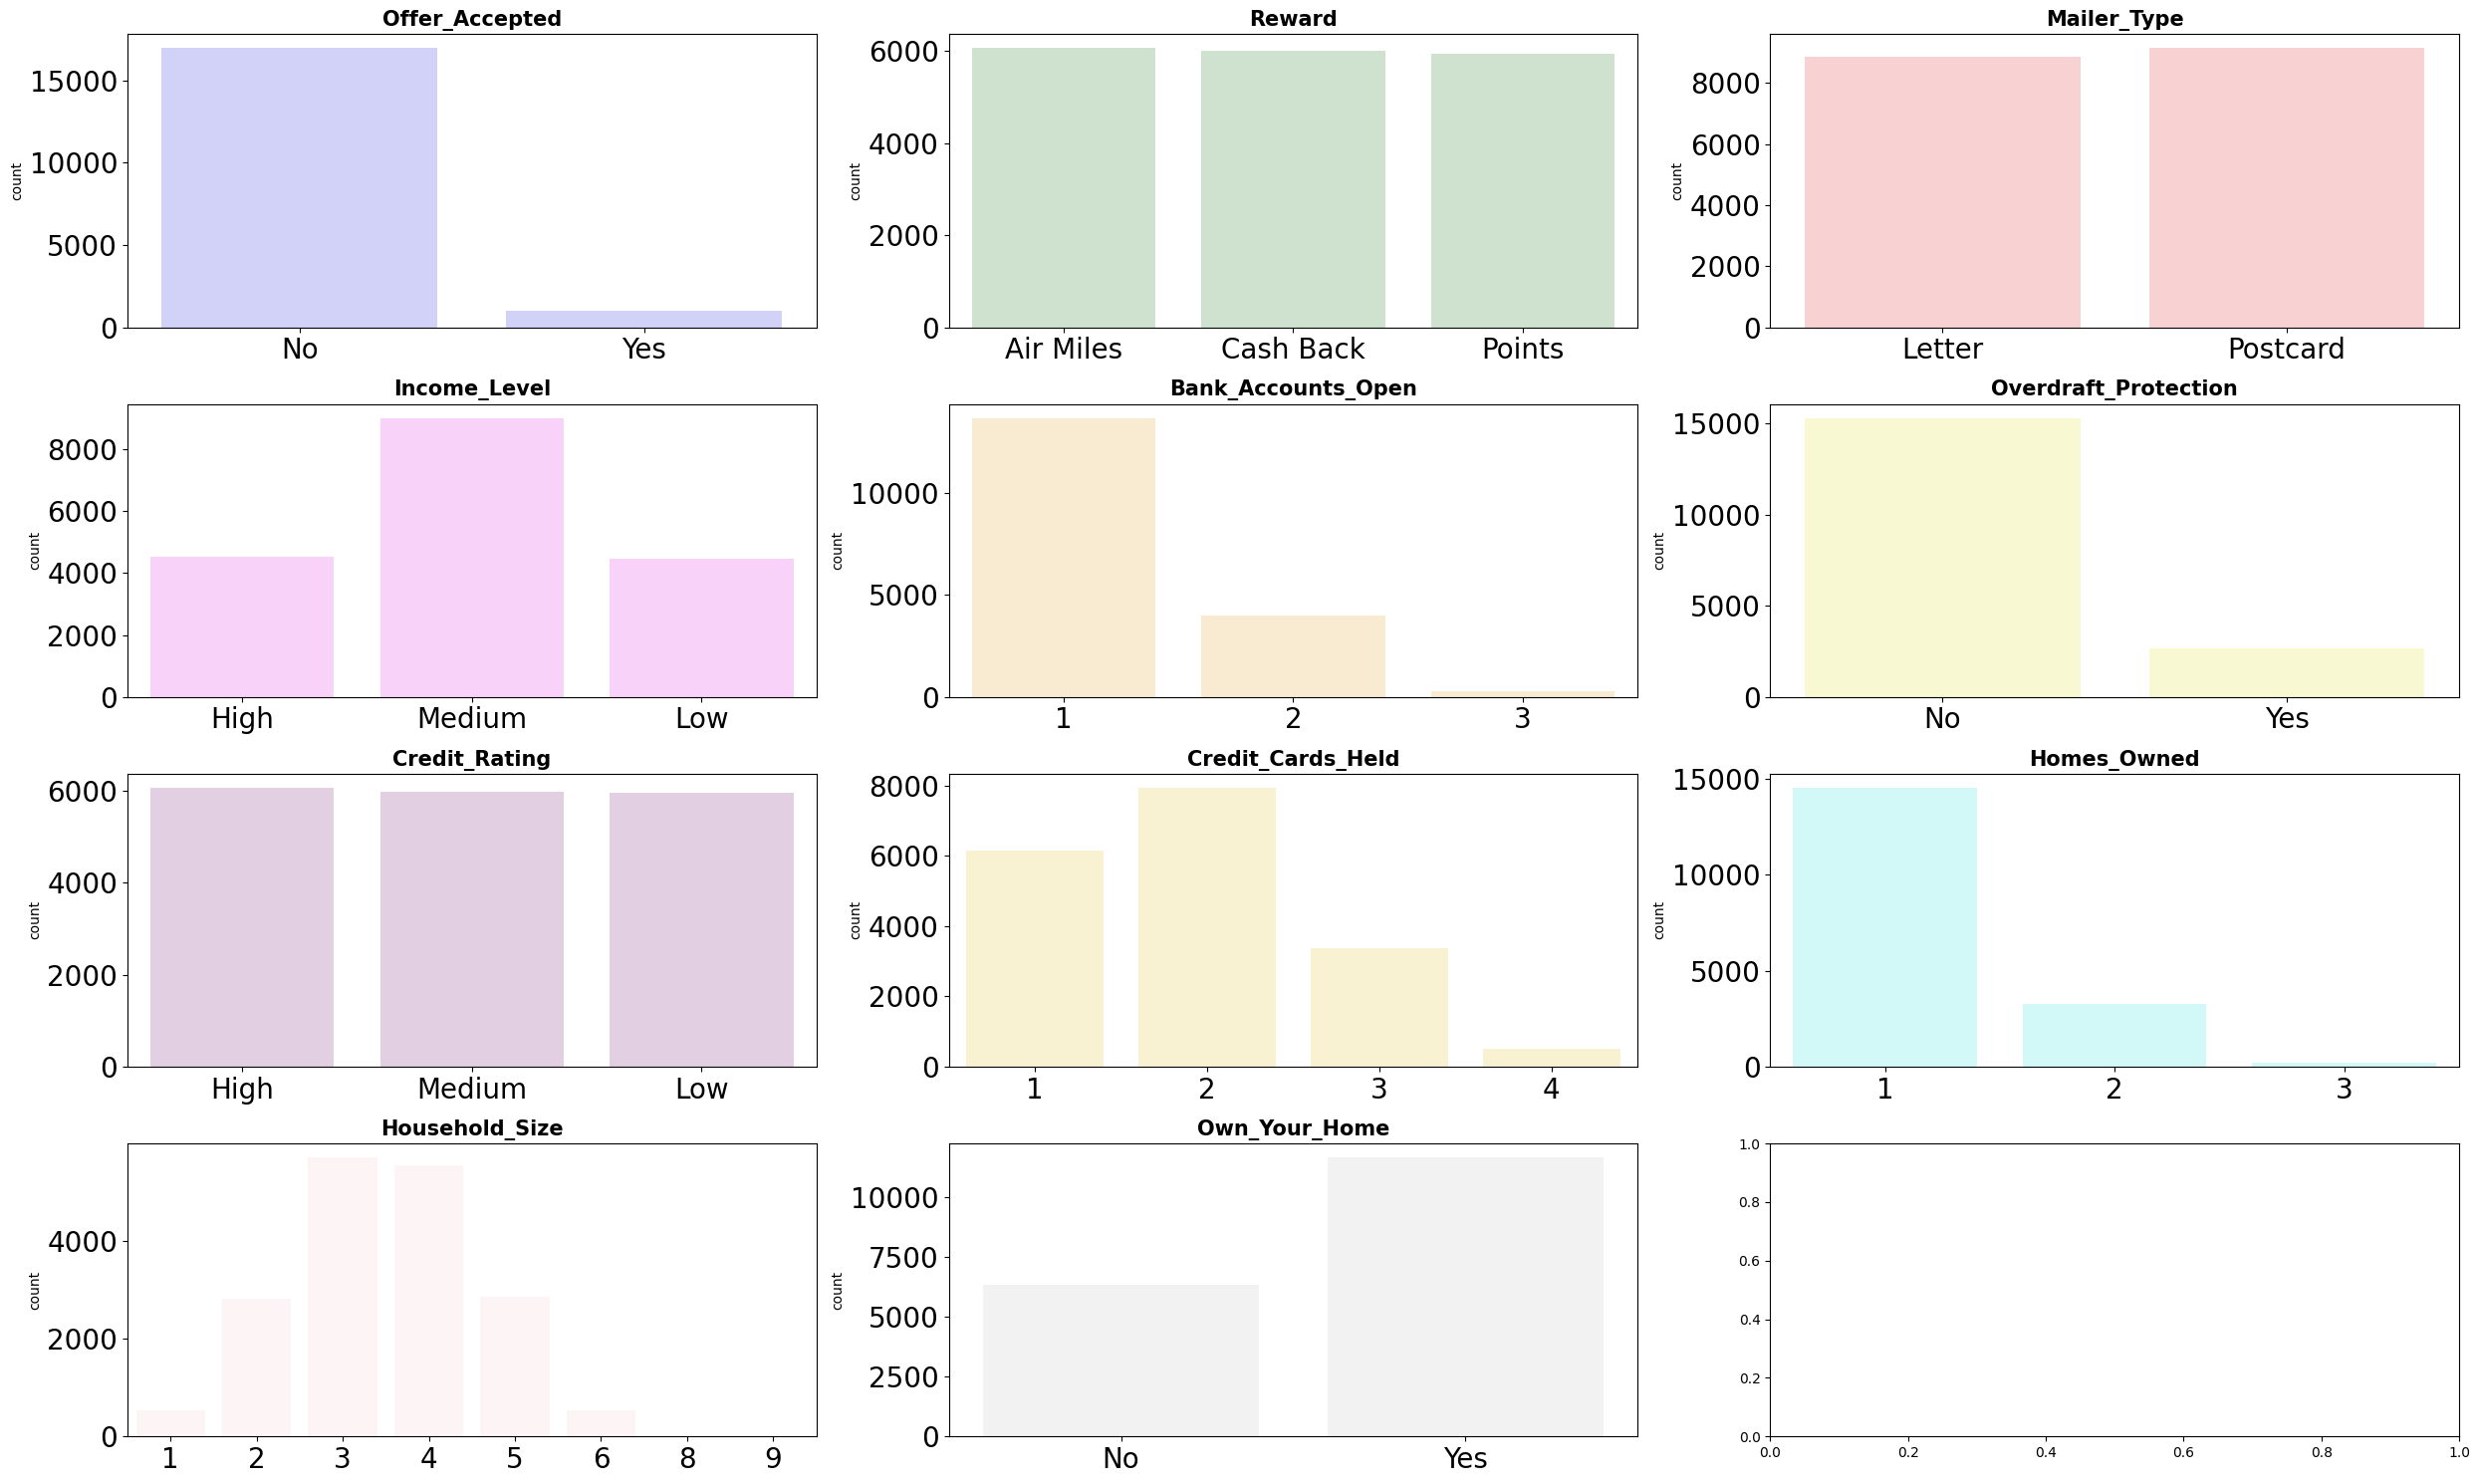

In [18]:
fig, axes = plt.subplots(nrows = 4, ncols = 3, figsize = (25, 15))

lista_colores = ["blue", "green", "red", "magenta", "orange", "yellow", "purple", "gold", "cyan","pink","silver","gray"]

axes = axes.flat

for i, colum in enumerate(df_credit_categoric): 
    sns.countplot(
        data = df_credit_categoric,
        x = colum,
        color = lista_colores[i], 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    

fig.tight_layout();

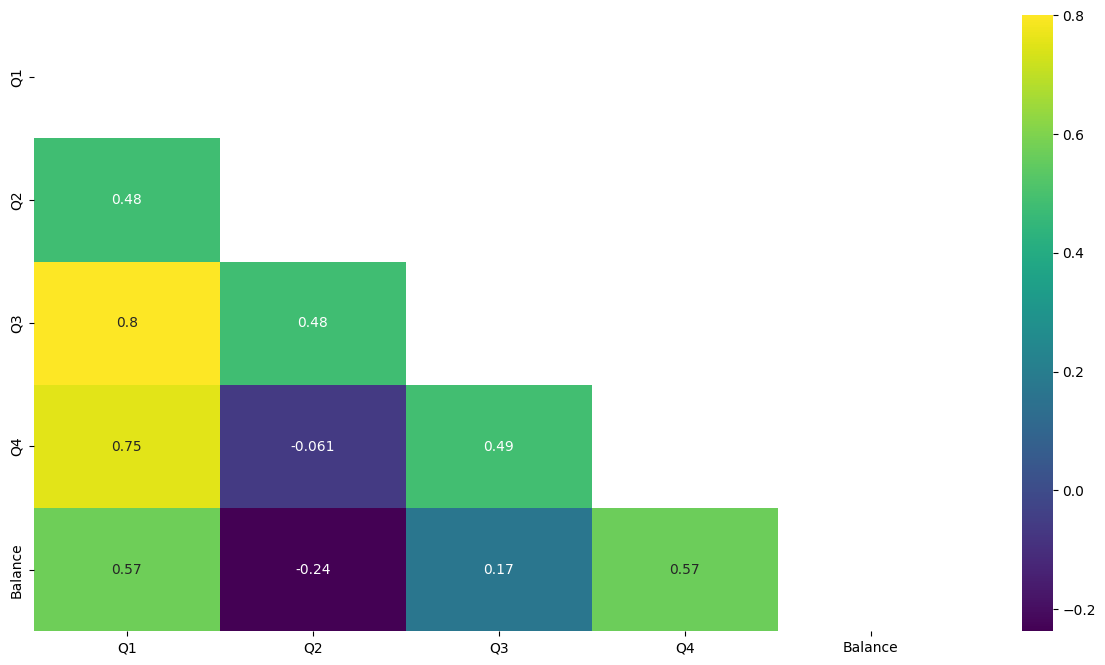

In [19]:
correlation = df_credit_numeric.corr()

plt.figure(figsize=(15,8))
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, cmap="viridis", annot = True, mask = mask); #barra lateral


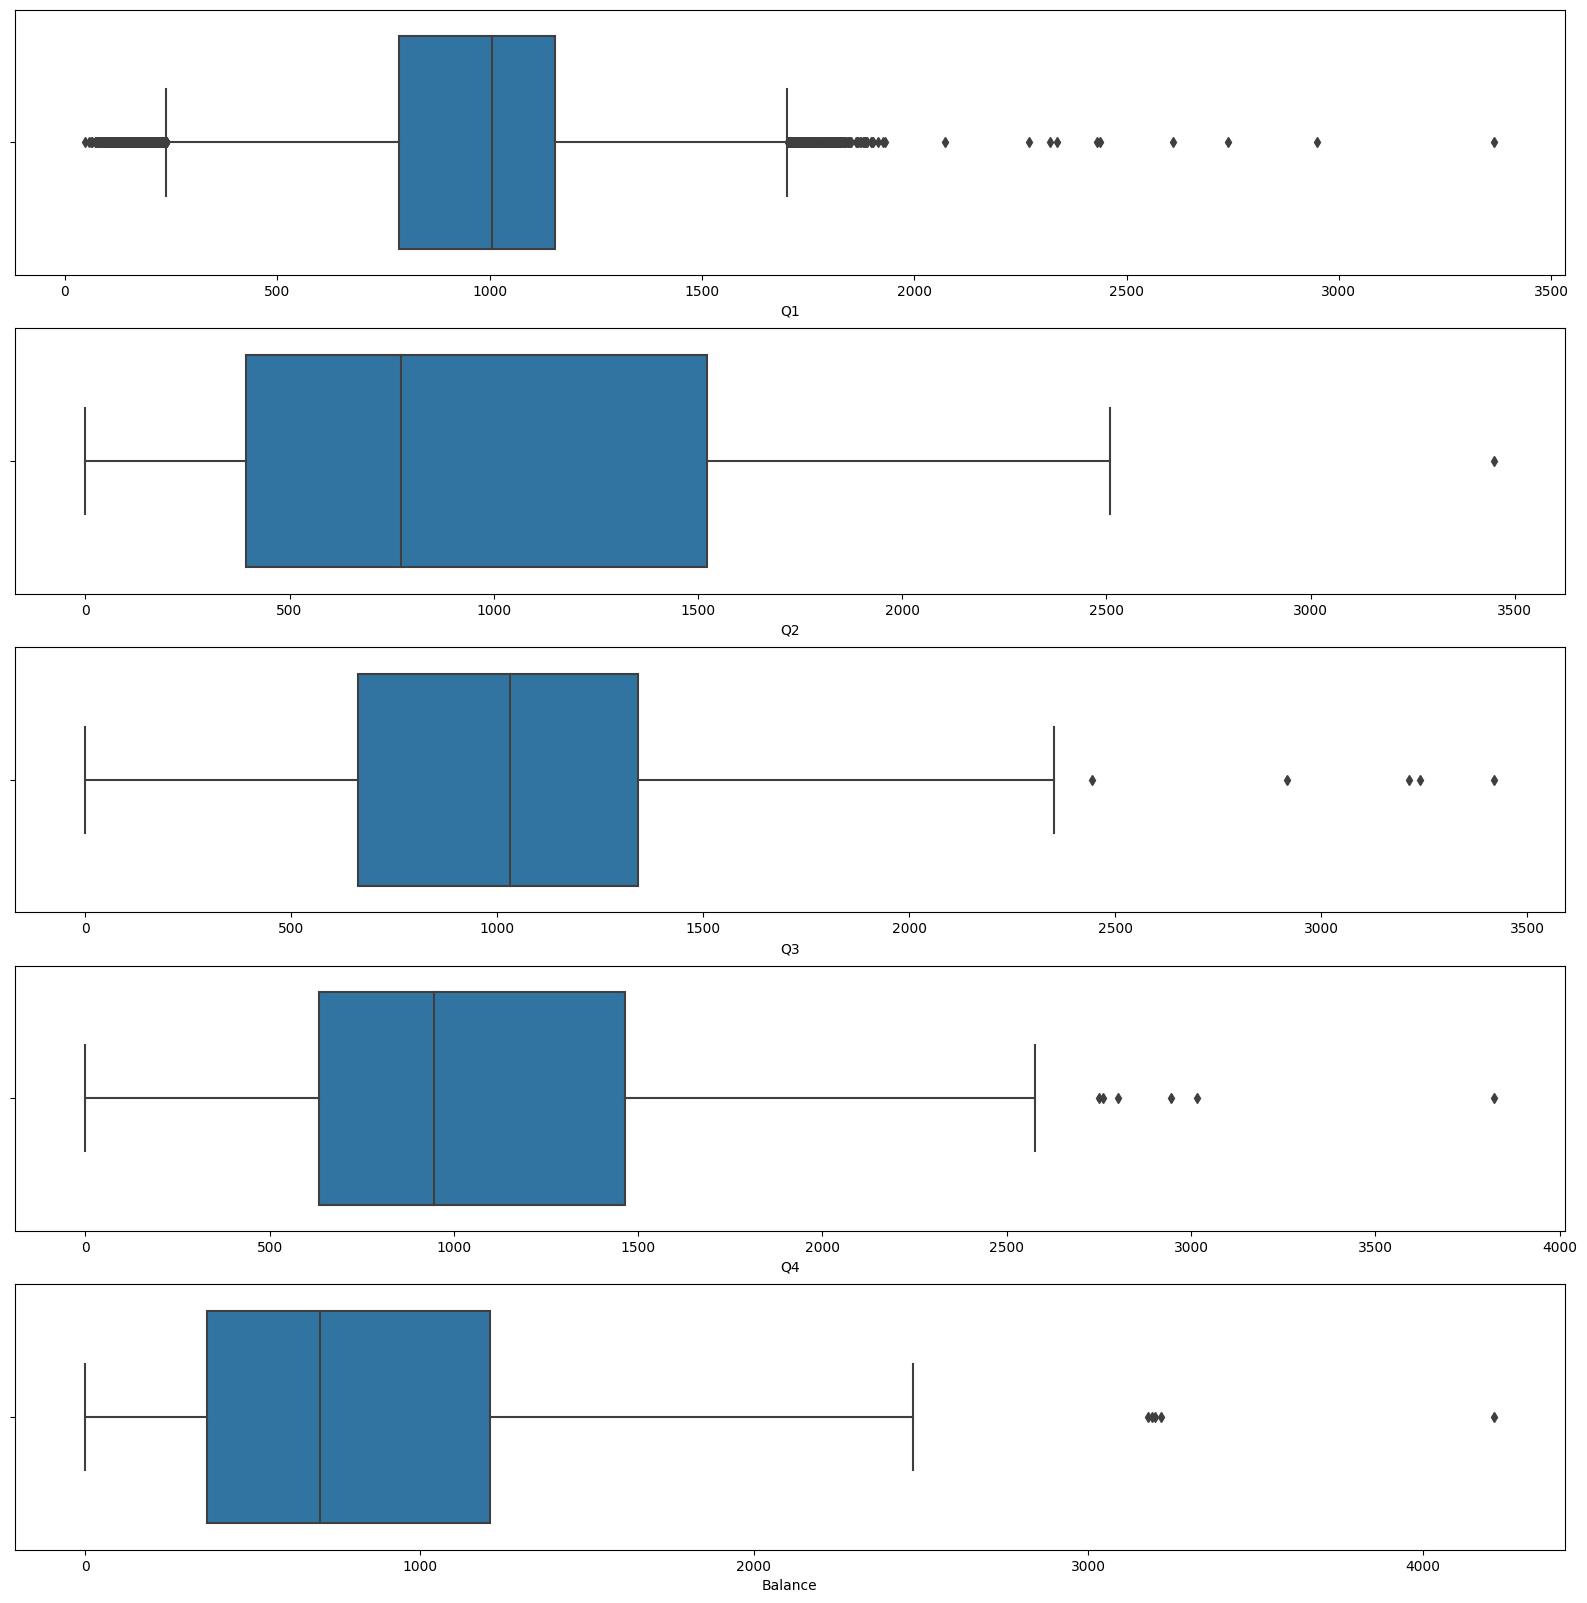

In [20]:
fig, ax = plt.subplots(5, 1, figsize=(20,20))

for i in range(len(df_credit_numeric.columns)):
    sns.boxplot(x=df_credit_numeric.columns[i], data=df_credit_numeric, ax=ax[i])
plt.show()

Limpieza de outliers y limpieza de nulos en las columnas numericas.

In [21]:
lista_columnas = df_credit_numeric.columns
lista_columnas

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Balance'], dtype='object')

In [22]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(dataframe[col], 25)
        Q3 = np.nanpercentile(dataframe[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        

    
    return dicc_indices 

In [23]:
ind = detectar_outliers(lista_columnas, df_credit_numeric)
print(ind)

{'Q1': [1, 22, 41, 79, 91, 98, 101, 134, 136, 149, 180, 181, 183, 196, 198, 200, 214, 216, 237, 242, 254, 261, 279, 288, 314, 334, 342, 345, 380, 382, 421, 430, 441, 454, 460, 517, 521, 527, 540, 568, 591, 597, 605, 607, 636, 641, 649, 661, 669, 686, 764, 767, 776, 802, 823, 828, 839, 840, 841, 861, 870, 892, 894, 906, 928, 980, 982, 986, 995, 1027, 1044, 1052, 1055, 1075, 1077, 1090, 1096, 1107, 1120, 1134, 1135, 1138, 1140, 1148, 1151, 1156, 1164, 1187, 1193, 1212, 1216, 1234, 1254, 1255, 1258, 1262, 1269, 1283, 1287, 1292, 1296, 1312, 1331, 1339, 1365, 1381, 1392, 1397, 1399, 1400, 1404, 1405, 1409, 1415, 1419, 1424, 1426, 1431, 1477, 1484, 1488, 1495, 1502, 1515, 1517, 1525, 1548, 1559, 1562, 1573, 1578, 1579, 1586, 1587, 1606, 1609, 1621, 1623, 1630, 1635, 1639, 1661, 1685, 1687, 1701, 1715, 1716, 1743, 1773, 1782, 1785, 1811, 1833, 1840, 1844, 1857, 1873, 1881, 1885, 1916, 1920, 1967, 1973, 1977, 2001, 2014, 2021, 2028, 2034, 2035, 2037, 2049, 2057, 2062, 2068, 2070, 2078, 2083, 

In [24]:
for k, v in ind.items():
    for i in v: 
        df_credit_numeric.loc[i,k] = np.nan 

In [25]:
df_credit_numeric 

,Q1,Q2,Q3,Q4,Balance
0,1160.75,1669.0,877.0,1095.0,1002.0
1,NaN,39.0,106.0,78.0,366.0
2,276.50,367.0,352.0,145.0,242.0
3,1219.00,1578.0,1760.0,1119.0,419.0
4,1211.00,2140.0,1357.0,982.0,365.0
...,...,...,...,...,...
17995,NaN,136.0,65.0,71.0,398.0
17996,850.50,984.0,940.0,943.0,535.0
17997,1087.25,918.0,767.0,1170.0,1494.0
17998,1022.25,626.0,983.0,865.0,1615.0


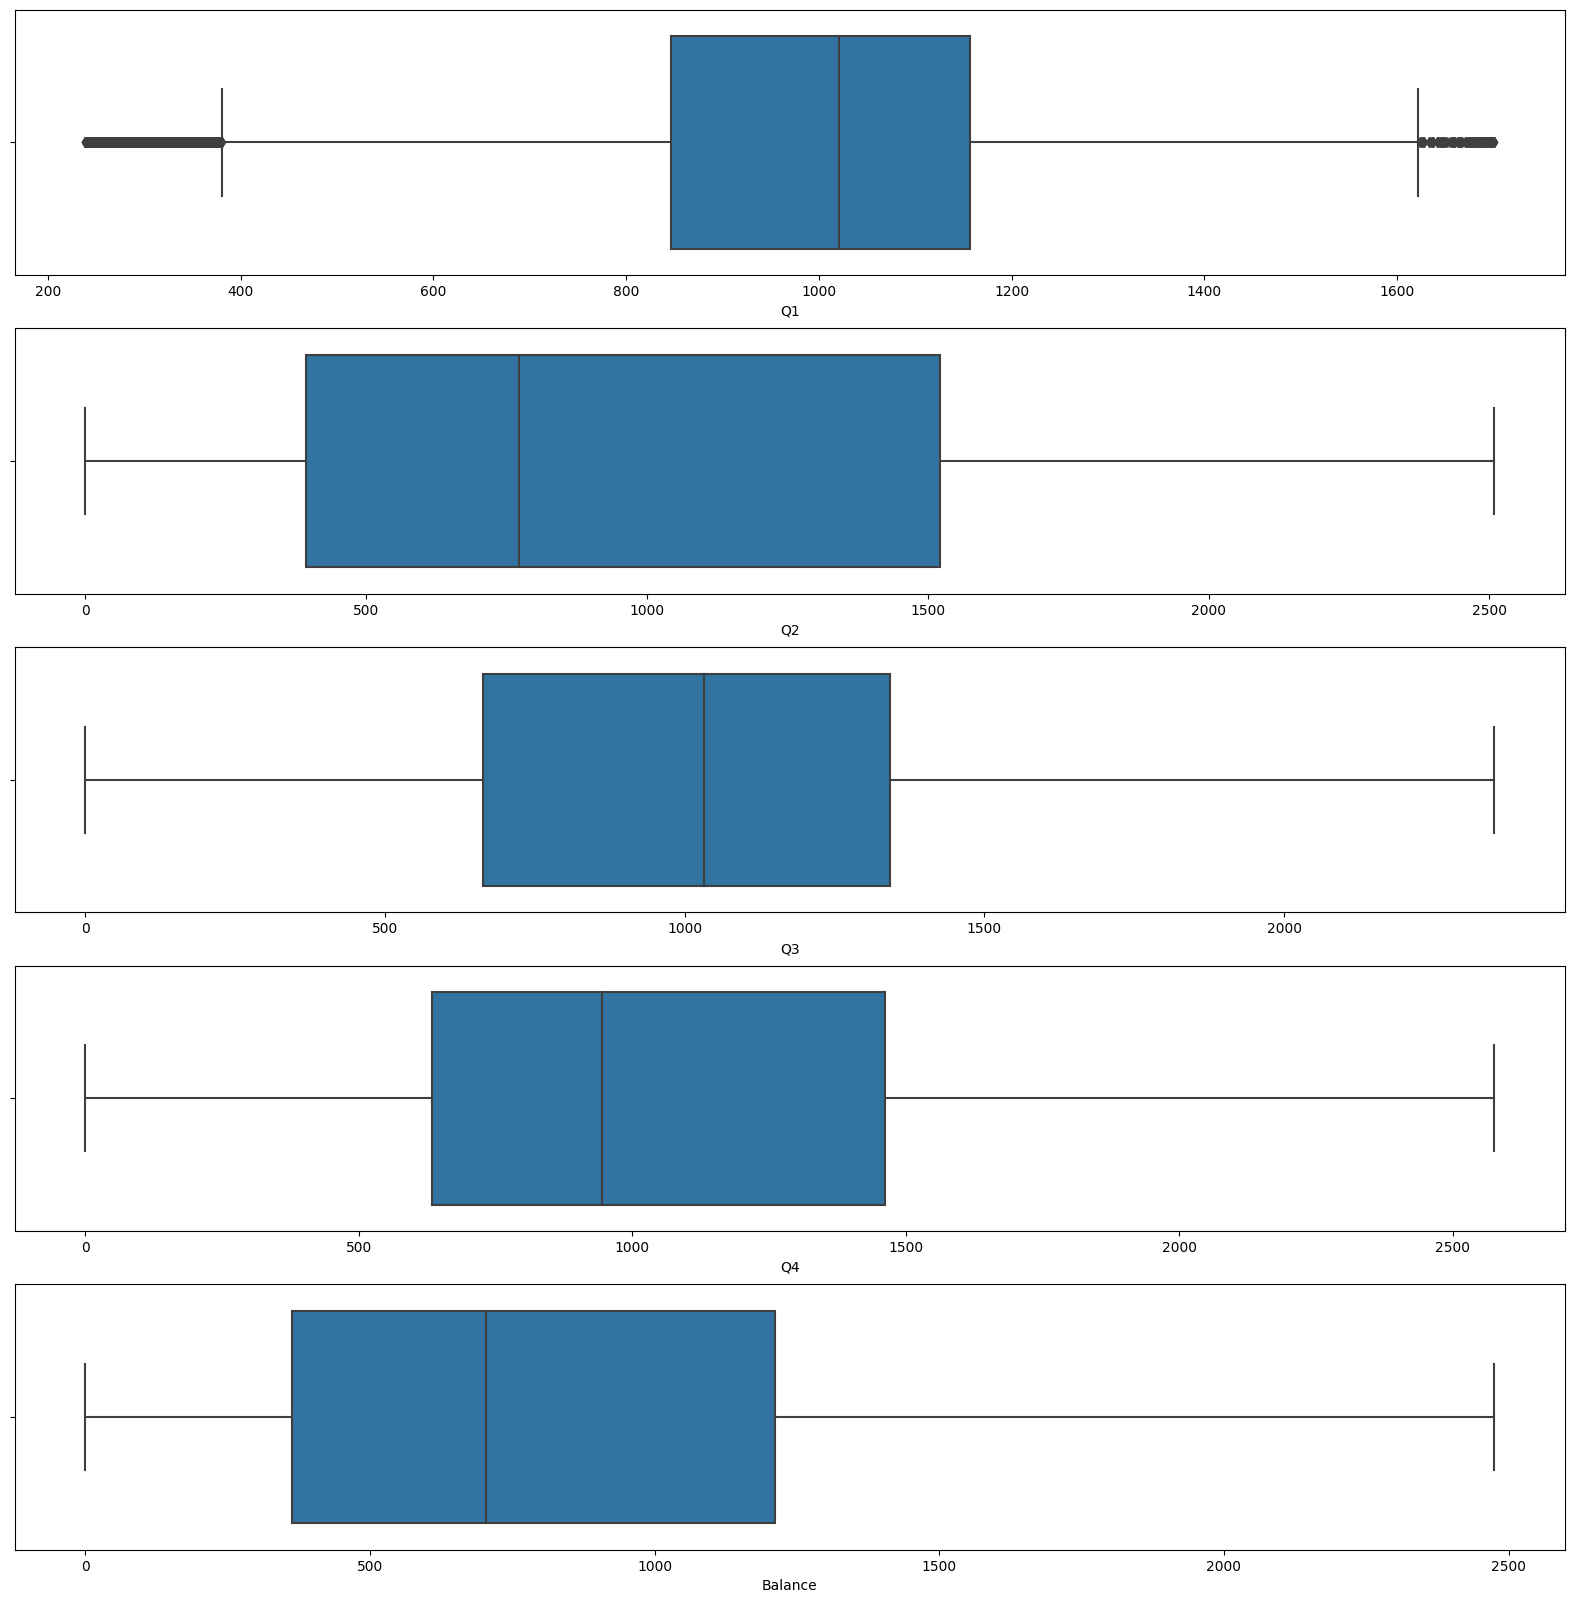

In [26]:
fig, ax = plt.subplots(5, 1, figsize=(20,20))

for i in range(len(df_credit_numeric.columns)):
    sns.boxplot(x=df_credit_numeric.columns[i], data=df_credit_numeric, ax=ax[i])
plt.show()

In [27]:
imputer = IterativeImputer()
imputer.fit(df_credit_numeric)

IterativeImputer()

In [28]:
imputer.transform(df_credit_numeric)

array([[1160.75, 1669.  ,  877.  , 1095.  , 1002.  ],
       [ 147.25,   39.  ,  106.  ,   78.  ,  366.  ],
       [ 276.5 ,  367.  ,  352.  ,  145.  ,  242.  ],
       ...,
       [1087.25,  918.  ,  767.  , 1170.  , 1494.  ],
       [1022.25,  626.  ,  983.  ,  865.  , 1615.  ],
       [1056.  ,  265.  , 1378.  , 1978.  ,  603.  ]])

In [29]:
numericas_trans = pd.DataFrame(imputer.transform(df_credit_numeric), columns = df_credit_numeric.columns)
numericas_trans.head(10)

,Q1,Q2,Q3,Q4,Balance
0,1160.75,1669.0,877.0,1095.0,1002.0
1,147.25,39.0,106.0,78.0,366.0
2,276.50,367.0,352.0,145.0,242.0
3,1219.00,1578.0,1760.0,1119.0,419.0
4,1211.00,2140.0,1357.0,982.0,365.0
5,1114.75,1847.0,1365.0,750.0,497.0
6,283.75,468.0,188.0,347.0,132.0
7,278.50,132.0,391.0,285.0,306.0
8,1005.00,894.0,891.0,882.0,1353.0
9,974.25,1814.0,1454.0,514.0,115.0


Estandarización.

In [30]:
robust = RobustScaler()

In [31]:
lista_num = numericas_trans.columns
lista_num


Index(['Q1', 'Q2', 'Q3', 'Q4', 'Balance'], dtype='object')

In [32]:
robust.fit(numericas_trans[lista_num])

RobustScaler()

In [33]:
X_robust = robust.transform(numericas_trans[lista_num])

In [34]:
numericas_trans[lista_num] = X_robust
numericas_trans.head()

,Q1,Q2,Q3,Q4,Balance
0,0.423037,0.795031,-0.227876,0.179952,0.352005
1,-2.356531,-0.651287,-1.365044,-1.048309,-0.397995
2,-2.002057,-0.360248,-1.002212,-0.967391,-0.544222
3,0.582791,0.714286,1.074484,0.208937,-0.335495
4,0.560850,1.212955,0.480088,0.043478,-0.399175


Encoding de columnas categoricas.

In [35]:
df_credit_categoric

,Offer_Accepted,Reward,Mailer_Type,Income_Level,Bank_Accounts_Open,Overdraft_Protection,Credit_Rating,Credit_Cards_Held,Homes_Owned,Household_Size,Own_Your_Home
0,No,Air Miles,Letter,High,1,No,High,2,1,4,No
1,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes
2,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes
3,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No
4,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes
...,...,...,...,...,...,...,...,...,...,...,...
17995,No,Cash Back,Letter,High,1,No,Low,1,1,5,Yes
17996,No,Cash Back,Letter,High,1,No,Low,3,1,3,Yes
17997,No,Cash Back,Letter,High,1,No,Low,2,1,4,No
17998,No,Cash Back,Letter,Medium,1,No,Medium,4,2,2,Yes


In [36]:
le = LabelEncoder()

def label_encoder(df, columnas):
    for col in df[columnas].columns:
        nuevo_nombre = col + "_encoded"
        df[nuevo_nombre] = le.fit_transform(df[col])
    return df

In [37]:
df_credit_categoric_encoded = label_encoder(df_credit_categoric, ["Offer_Accepted", "Reward","Mailer_Type","Income_Level","Overdraft_Protection","Credit_Rating","Own_Your_Home"])
df_credit_categoric_encoded = df_credit_categoric_encoded.drop(["Offer_Accepted","Reward","Mailer_Type","Income_Level","Overdraft_Protection","Credit_Rating","Own_Your_Home"],axis=1)


In [38]:
df_credit_categoric_encoded

,Bank_Accounts_Open,Credit_Cards_Held,Homes_Owned,Household_Size,Offer_Accepted_encoded,Reward_encoded,Mailer_Type_encoded,Income_Level_encoded,Overdraft_Protection_encoded,Credit_Rating_encoded,Own_Your_Home_encoded
0,1,2,1,4,0,0,0,0,0,0,0
1,1,2,2,5,0,0,0,2,0,2,1
2,2,2,1,2,0,0,1,0,0,2,1
3,2,1,1,4,0,0,0,2,0,0,0
4,1,2,1,6,0,0,0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
17995,1,1,1,5,0,1,0,0,0,1,1
17996,1,3,1,3,0,1,0,0,0,1,1
17997,1,2,1,4,0,1,0,0,0,1,0
17998,1,4,2,2,0,1,0,2,0,2,1


Balanceo

In [39]:
df_credit_limpio = pd.concat([df_credit_categoric_encoded,numericas_trans],axis = 1)
df_credit_limpio

,Bank_Accounts_Open,Credit_Cards_Held,Homes_Owned,Household_Size,Offer_Accepted_encoded,Reward_encoded,Mailer_Type_encoded,Income_Level_encoded,Overdraft_Protection_encoded,Credit_Rating_encoded,Own_Your_Home_encoded,Q1,Q2,Q3,Q4,Balance
0,1,2,1,4,0,0,0,0,0,0,0,0.423037,0.795031,-0.227876,0.179952,0.352005
1,1,2,2,5,0,0,0,2,0,2,1,-2.356531,-0.651287,-1.365044,-1.048309,-0.397995
2,2,2,1,2,0,0,1,0,0,2,1,-2.002057,-0.360248,-1.002212,-0.967391,-0.544222
3,2,1,1,4,0,0,0,2,0,0,0,0.582791,0.714286,1.074484,0.208937,-0.335495
4,1,2,1,6,0,0,0,2,0,2,1,0.560850,1.212955,0.480088,0.043478,-0.399175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,1,1,1,5,0,1,0,0,0,1,1,-2.300994,-0.565217,-1.425516,-1.056763,-0.360259
17996,1,3,1,3,0,1,0,0,0,1,1,-0.427837,0.187223,-0.134956,-0.003623,-0.198703
17997,1,2,1,4,0,1,0,0,0,1,0,0.221460,0.128660,-0.390118,0.270531,0.932193
17998,1,4,2,2,0,1,0,2,0,2,1,0.043195,-0.130435,-0.071534,-0.097826,1.074882


In [40]:
mayoritarios = df_credit_limpio[df_credit_limpio["Offer_Accepted_encoded"] == 0].sample(4000, random_state = 42)
mayoritarios["Offer_Accepted_encoded"]

10135    0
5937     0
12829    0
7057     0
4109     0
        ..
11378    0
13035    0
12329    0
17087    0
4968     0
Name: Offer_Accepted_encoded, Length: 4000, dtype: int32

In [41]:
minoritarios = df_credit_limpio[df_credit_limpio["Offer_Accepted_encoded"]==1].sample(3000, replace=True)
minoritarios.shape


(3000, 16)

In [42]:
balanceado = pd.concat([mayoritarios,minoritarios], axis = 0)
balanceado.shape

(7000, 16)

In [43]:
balanceado = balanceado.reset_index().drop("index",axis = 1)

In [44]:
balanceado.head(5)

,Bank_Accounts_Open,Credit_Cards_Held,Homes_Owned,Household_Size,Offer_Accepted_encoded,Reward_encoded,Mailer_Type_encoded,Income_Level_encoded,Overdraft_Protection_encoded,Credit_Rating_encoded,Own_Your_Home_encoded,Q1,Q2,Q3,Q4,Balance
0,1,1,1,3,0,1,1,2,1,2,1,-0.72746,0.021295,-0.189528,-0.262077,-0.197524
1,1,1,1,4,0,1,0,0,0,1,1,-0.10833,1.087844,0.151180,-0.364734,-0.722288
2,2,1,1,1,0,0,1,1,0,1,1,-0.97086,0.002662,-0.519912,-0.533816,-0.061910
3,2,1,1,4,0,2,1,1,0,2,1,0.52794,0.230701,1.133481,-0.027778,0.396816
4,1,2,2,3,0,0,1,1,0,0,0,1.39664,0.604259,0.422566,1.605072,0.368514


Ajuste del modelo.

In [45]:
X = balanceado.drop("Offer_Accepted_encoded", axis = 1) # variables predictoras
y = balanceado["Offer_Accepted_encoded"] # variable respuesta 

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 666)

In [47]:
y_train.describe()

count    5600.000000
mean        0.422857
std         0.494057
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Offer_Accepted_encoded, dtype: float64

In [48]:
y_test.describe()

count    1400.000000
mean        0.451429
std         0.497813
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Offer_Accepted_encoded, dtype: float64

Regresión logistica.

In [49]:
lr = LogisticRegression(max_iter = 100000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=100000)

In [50]:
y_pred_lr_test = lr.predict(X_test)
y_pred_lr_train = lr.predict(X_train)

In [51]:
def matriz_confusion(clases_reales, clases_predichas, total_filas_test):
  
    matriz = confusion_matrix(clases_reales, clases_predichas)

    plt.figure(figsize = (12, 8))
    sns.heatmap(matriz, square=True, annot=True, fmt="d", cmap = "viridis")

    plt.xlabel('valor predicho')
    plt.ylabel('valor real')
    plt.show()

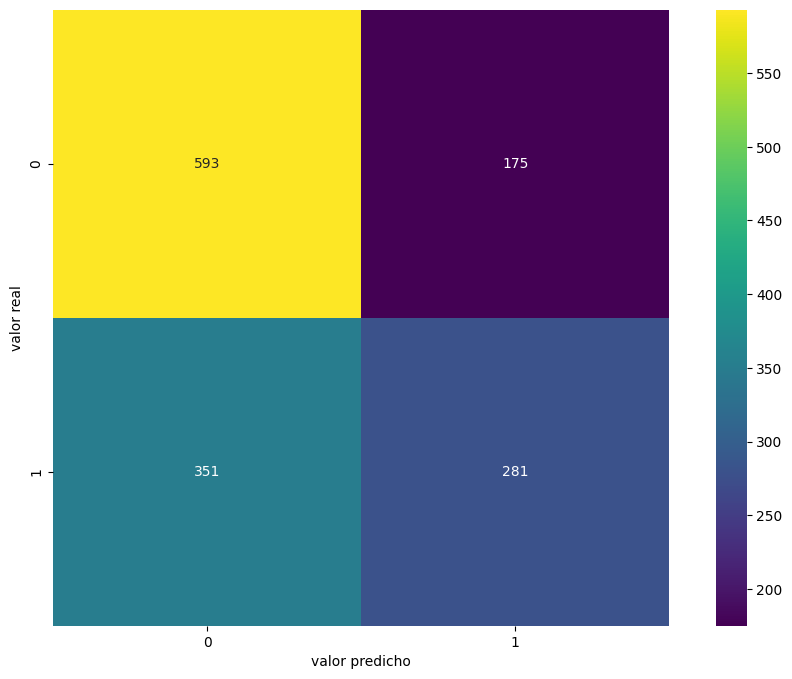

In [52]:
matriz_logistica = matriz_confusion(y_test, y_pred_lr_test, y_test.shape[0])
matriz_logistica

In [53]:
accuracy = accuracy_score(y_test, y_pred_lr_test)
accuracy

0.6242857142857143

In [54]:
recall = recall_score(y_test, y_pred_lr_test)
recall

0.44462025316455694

In [55]:
f1 = f1_score(y_test, y_pred_lr_test)
f1

0.5165441176470589

In [56]:
kappa = cohen_kappa_score(y_test, y_pred_lr_test)
kappa

0.22223536568879276

In [57]:
def metricas(clases_reales_test, clases_predichas_test, clases_reales_train, clases_predichas_train, modelo):
    
    # para el test
    accuracy_test = accuracy_score(clases_reales_test, clases_predichas_test)
    precision_test = precision_score(clases_reales_test, clases_predichas_test)
    recall_test = recall_score(clases_reales_test, clases_predichas_test)
    f1_test = f1_score(clases_reales_test, clases_predichas_test)
    kappa_test = cohen_kappa_score(clases_reales_test, clases_predichas_test)

    # para el train
    accuracy_train = accuracy_score(clases_reales_train, clases_predichas_train)
    precision_train = precision_score(clases_reales_train, clases_predichas_train)
    recall_train = recall_score(clases_reales_train, clases_predichas_train)
    f1_train = f1_score(clases_reales_train, clases_predichas_train)
    kappa_train = cohen_kappa_score(clases_reales_train, clases_predichas_train)
    

    
    df = pd.DataFrame({"accuracy": [accuracy_test, accuracy_train], 
                       "precision": [precision_test, precision_train],
                       "recall": [recall_test, recall_train], 
                       "f1": [f1_test, f1_train],
                       "kapppa": [kappa_test, kappa_train],
                       "set": ["test", "train"]})
    
    df["modelo"] = modelo
    return df

In [58]:
results_logistic = metricas(y_test, y_pred_lr_test, y_train, y_pred_lr_train, "Regresión logistica")
results_logistic

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.624286,0.616228,0.444620,0.516544,0.222235,test,Regresión logistica
1,0.611607,0.553641,0.420608,0.478042,0.177868,train,Regresión logistica


Decision Tree.

In [59]:
arbol = DecisionTreeClassifier()
arbol.fit(X_train, y_train)

DecisionTreeClassifier()

In [60]:
# max features
max_features = np.sqrt(len(X_train.columns))
max_features

3.872983346207417

In [61]:
y_pred_train_dt = arbol.predict(X_train)
y_pred_test_dt = arbol.predict(X_test)

In [62]:
results_decission_tree1 = metricas(y_test, y_pred_test_dt,y_train, y_pred_train_dt, "Decission Tree I" )
results_decission_tree1

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.865714,0.795213,0.946203,0.864162,0.733353,test,Decission Tree I
1,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decission Tree I


In [63]:
# veamos cual es la profundidad de nuestro árbol
print(arbol.tree_.max_depth)

25


In [64]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param = {"max_depth": [2,3,4,6,8,10,15,20,25,30,31,32,33],
         "min_samples_split": [10,20,30,40,50,100],
         "max_features": [7,8,9,10,11,12], 
         "min_samples_leaf": [10,20,30,40,50,100]}

# Búsqueda por grid search con validación cruzada
# ==============================================================================
arbol2 = GridSearchCV(
        estimator = DecisionTreeClassifier(), 
        param_grid = param, 
        n_jobs = -1,
        verbose = 1, 
        cv = 10, 
        return_train_score = True, 
        scoring = "neg_mean_squared_error")

In [65]:
%%time
arbol2.fit(X_train, y_train)

Fitting 10 folds for each of 2808 candidates, totalling 28080 fits
CPU times: total: 18.2 s
Wall time: 56.7 s


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 6, 8, 10, 15, 20, 25, 30, 31,
                                       32, 33],
                         'max_features': [7, 8, 9, 10, 11, 12],
                         'min_samples_leaf': [10, 20, 30, 40, 50, 100],
                         'min_samples_split': [10, 20, 30, 40, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [66]:
arbol2.best_params_

{'max_depth': 32,
 'max_features': 12,
 'min_samples_leaf': 10,
 'min_samples_split': 10}

In [67]:
arbol3 = DecisionTreeClassifier( max_depth =  10, max_features=8, min_samples_split=50, min_samples_leaf=10)
arbol3.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, max_features=8, min_samples_leaf=10,
                       min_samples_split=50)

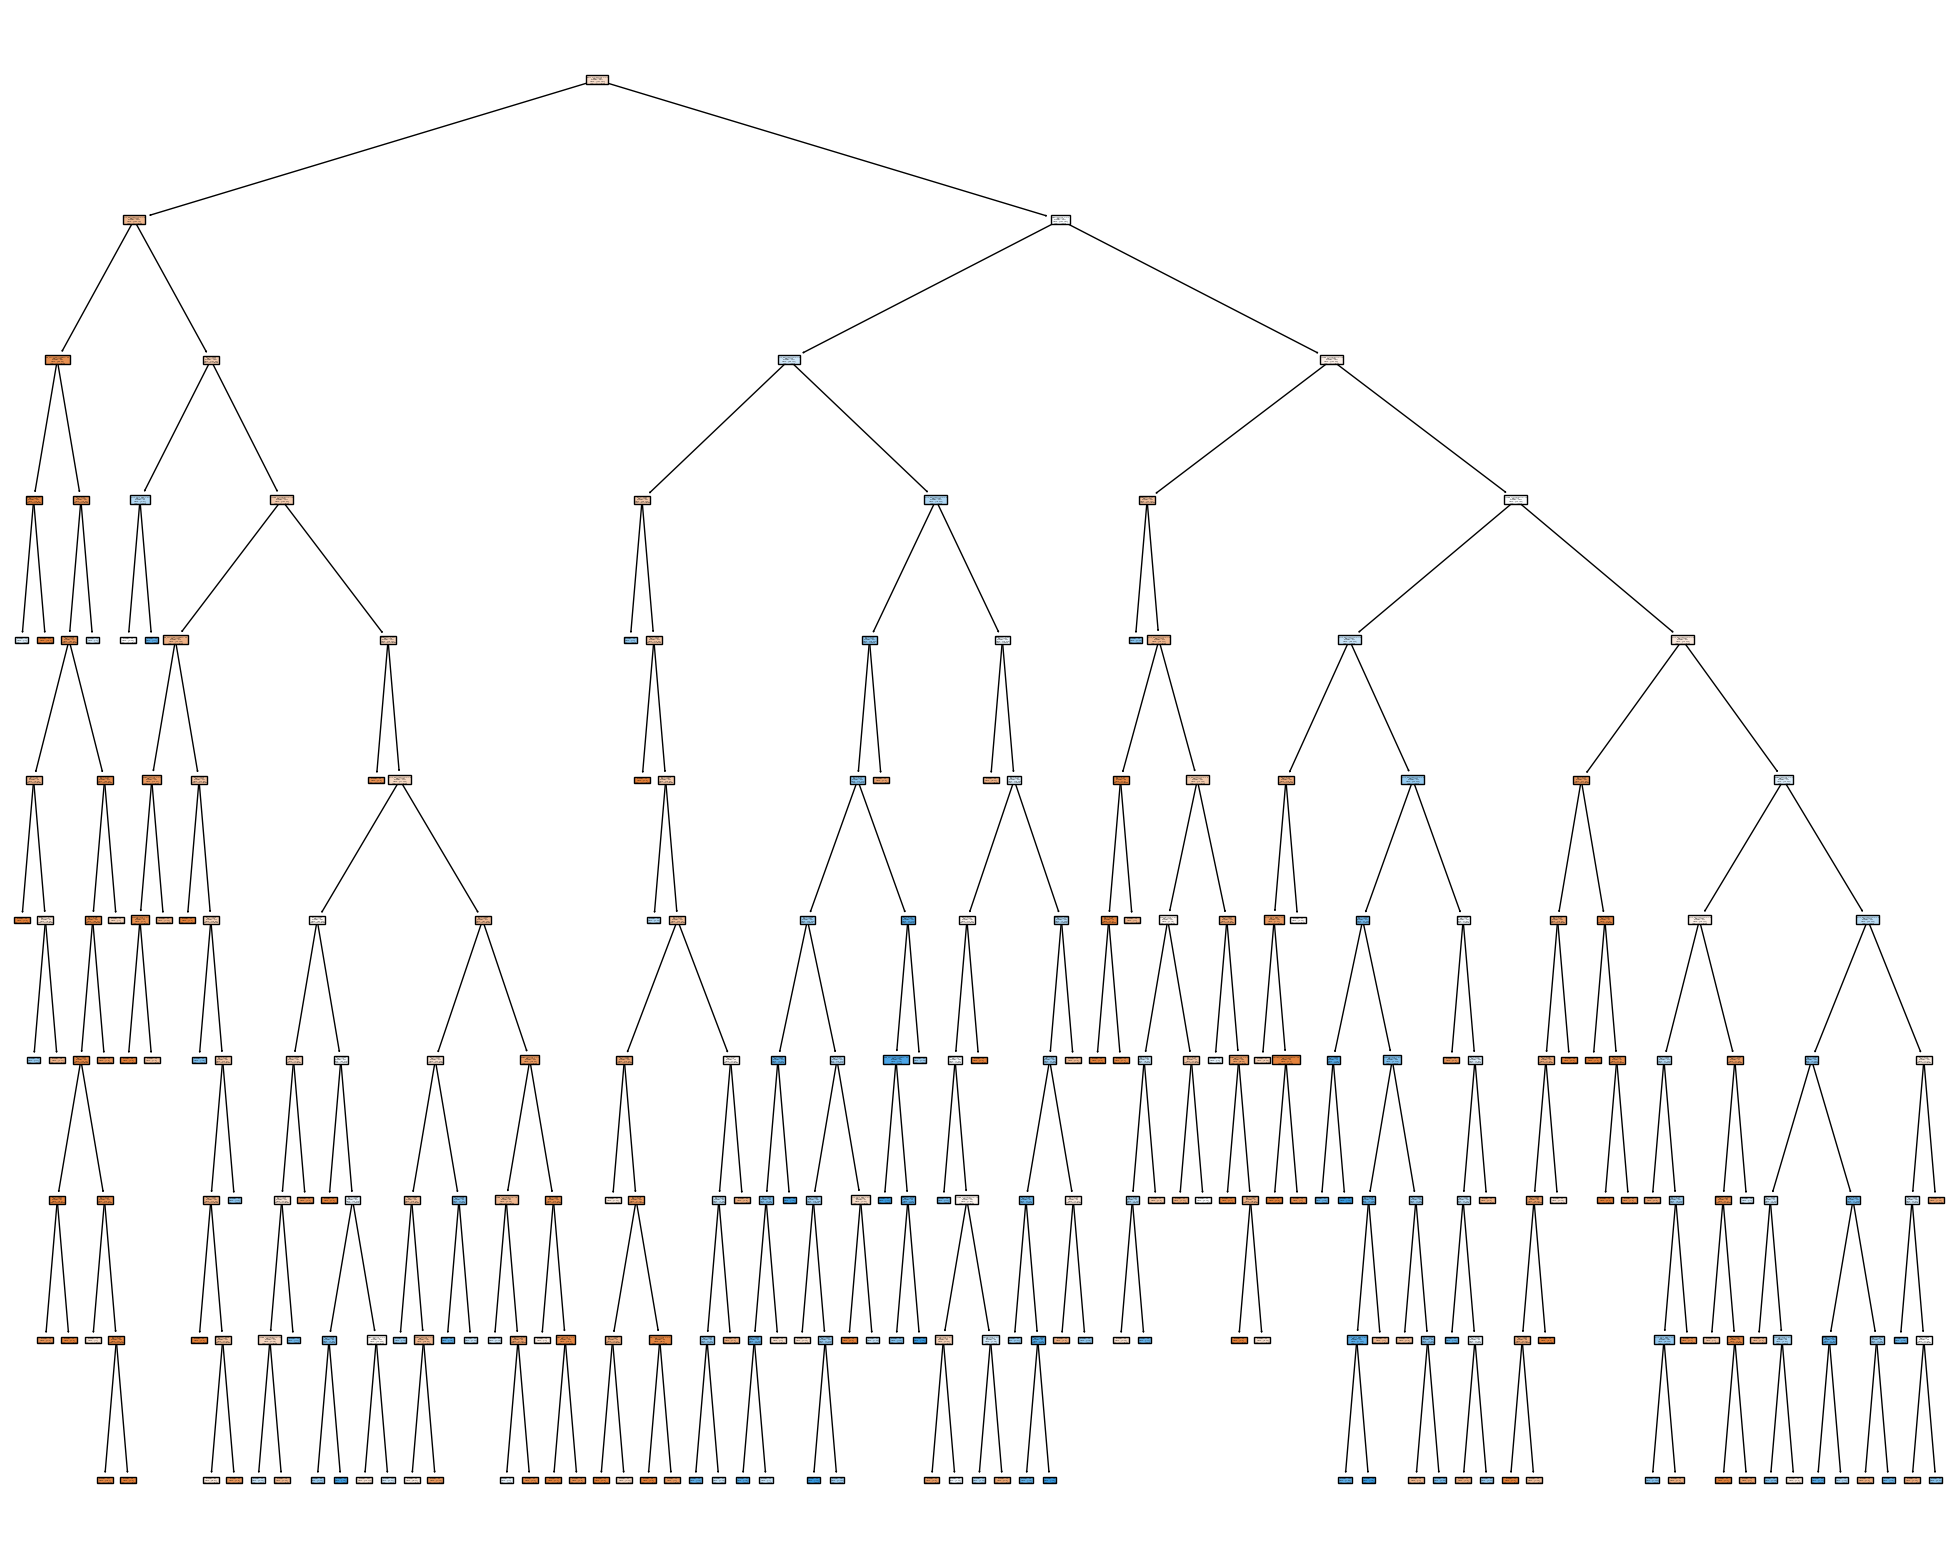

In [68]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(arbol3,
                   feature_names=X.columns,
                   class_names=['Not accepted', "Accepted"],
                   filled=True)
plt.show()

In [69]:
y_pred_arbol_test= arbol3.predict(X_test)
y_pred_arbol_train= arbol3.predict(X_train)

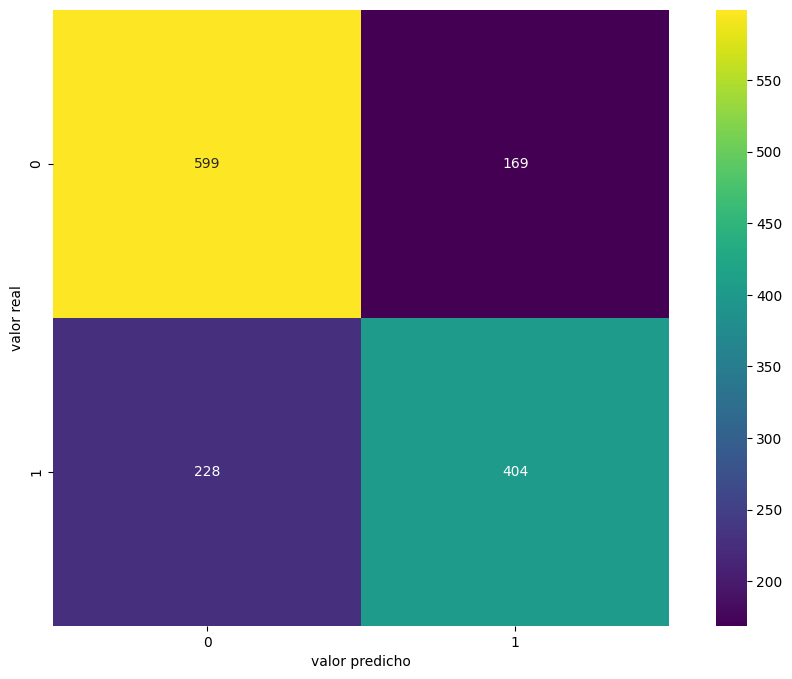

In [70]:
matriz_arbol = matriz_confusion(y_test, y_pred_arbol_test, y_test.shape[0])
matriz_arbol

In [71]:
results_decission_tree2 =  metricas(y_test, y_pred_arbol_test, y_train, y_pred_arbol_train, "Decission Tree II")
results_decission_tree2

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.716429,0.705061,0.639241,0.670539,0.422682,test,Decission Tree II
1,0.764464,0.723477,0.717061,0.720255,0.516869,train,Decission Tree II


In [72]:
df_all_results = pd.concat([results_logistic, results_decission_tree2], axis = 0)
df_all_results

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.624286,0.616228,0.444620,0.516544,0.222235,test,Regresión logistica
1,0.611607,0.553641,0.420608,0.478042,0.177868,train,Regresión logistica
0,0.716429,0.705061,0.639241,0.670539,0.422682,test,Decission Tree II
1,0.764464,0.723477,0.717061,0.720255,0.516869,train,Decission Tree II


Random Forest

In [73]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param = {"max_depth": [32,33,34],
         "min_samples_split": [10,20,30,40,50],
         "max_features": [5,6,7], 
         "min_samples_leaf": [10,20,30,40,50]}


# Búsqueda por grid search con validación cruzada (cross-validarion)
# ==============================================================================
random_forest = GridSearchCV(
        estimator = RandomForestClassifier(), 
        param_grid = param, 
        n_jobs = -1,
        verbose = 1,  
        cv = 10, 
        return_train_score = True, 
        scoring = "neg_mean_squared_error")

In [74]:
%%time
random_forest.fit(X_train, y_train)

Fitting 10 folds for each of 225 candidates, totalling 2250 fits
CPU times: total: 9.92 s
Wall time: 4min 7s


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [32, 33, 34], 'max_features': [5, 6, 7],
                         'min_samples_leaf': [10, 20, 30, 40, 50],
                         'min_samples_split': [10, 20, 30, 40, 50]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [75]:
random_forest.best_params_

{'max_depth': 34,
 'max_features': 6,
 'min_samples_leaf': 10,
 'min_samples_split': 20}

In [76]:
clf=RandomForestClassifier(min_samples_split= 10,
                           min_samples_leaf= 10,
                           max_features=6,
                           max_depth=15)
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=15, max_features=6, min_samples_leaf=10,
                       min_samples_split=10)

In [77]:
y_pred_clf_test= clf.predict(X_test)
y_pred_clf_train= clf.predict(X_train)

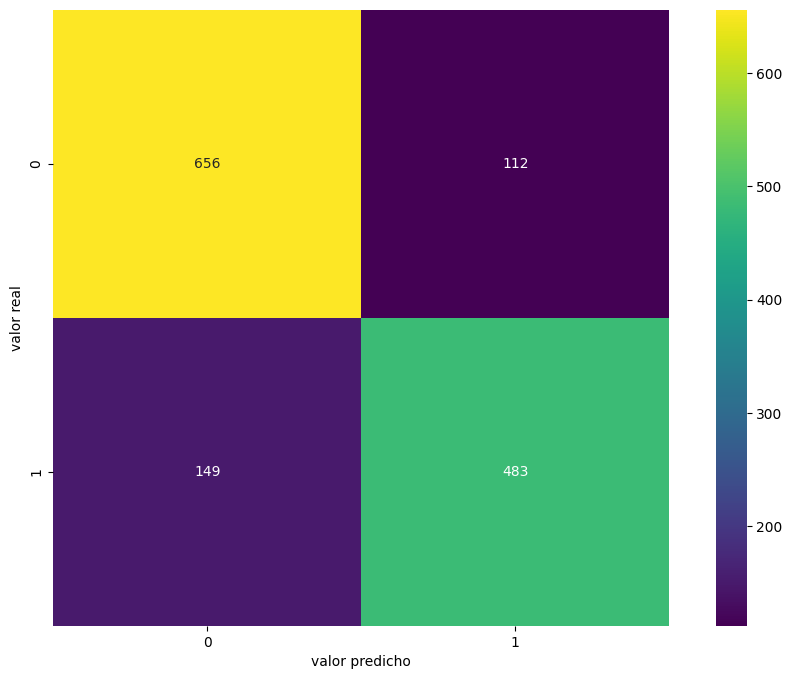

In [78]:
matriz_random = matriz_confusion(y_test, y_pred_clf_test, y_test.shape[0])
matriz_random

In [79]:
results_forest = metricas(y_test, y_pred_clf_test, y_train, y_pred_clf_train, "Random Forest")
df_all_results = pd.concat([df_all_results, results_forest], axis = 0)
df_all_results

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.624286,0.616228,0.444620,0.516544,0.222235,test,Regresión logistica
1,0.611607,0.553641,0.420608,0.478042,0.177868,train,Regresión logistica
0,0.716429,0.705061,0.639241,0.670539,0.422682,test,Decission Tree II
1,0.764464,0.723477,0.717061,0.720255,0.516869,train,Decission Tree II
0,0.813571,0.811765,0.764241,0.787286,0.621629,test,Random Forest
1,0.906429,0.892007,0.885980,0.888983,0.808120,train,Random Forest


KNeighborsClassifier

In [80]:
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'positive_likelihood_ratio', 'neg_negative_likelihood_ratio', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weig

In [81]:
knn_scores = []

for k in range(1,21):
    # por defecto nos devuelve la precisión
    score=cross_val_score(KNeighborsClassifier(n_neighbors = k),
                          X = X,
                          y = y,
                          cv=10, 
                         scoring = "accuracy")
    knn_scores.append(score.mean())

In [82]:
knn = pd.DataFrame(knn_scores, range(1,21)).reset_index()
knn.columns = ["number_neighbors", "score"]
knn.sort_values(by = "score", ascending = False).head(3)

,number_neighbors,score
0,1,0.869857
1,2,0.834286
2,3,0.788571


In [83]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [84]:
y_pred_knn_test = knn.predict(X_test)
y_pred_knn_train = knn.predict(X_train)

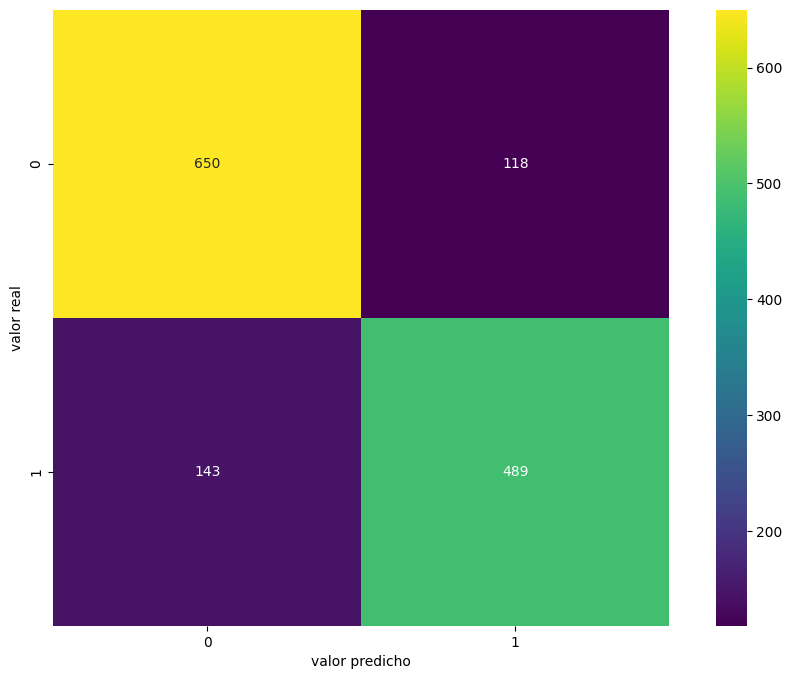

In [85]:
matriz_knn = matriz_confusion(y_test, y_pred_knn_test, y_test.shape[0])
matriz_knn

In [86]:
results_knn = metricas(y_test, y_pred_knn_test, y_train, y_pred_knn_train, "KNN2")
df_all_results = pd.concat([df_all_results, results_knn])
df_all_results

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.624286,0.616228,0.444620,0.516544,0.222235,test,Regresión logistica
1,0.611607,0.553641,0.420608,0.478042,0.177868,train,Regresión logistica
0,0.716429,0.705061,0.639241,0.670539,0.422682,test,Decission Tree II
1,0.764464,0.723477,0.717061,0.720255,0.516869,train,Decission Tree II
0,0.813571,0.811765,0.764241,0.787286,0.621629,test,Random Forest
1,0.906429,0.892007,0.885980,0.888983,0.808120,train,Random Forest
0,0.813571,0.805601,0.773734,0.789346,0.622268,test,KNN2
1,0.971964,1.000000,0.933699,0.965713,0.942048,train,KNN2


Gradient Boosting.

In [87]:
param = {"max_depth": [2,3, 4,6,8,10,15,20,25,30,31,32,33],
         "min_samples_split": [50, 100, 150, 200, 250],
         "max_features": [1,2,3,4,5,6,7,8,9], 
         "min_samples_leaf": [10,20,30,40,50, 100, 150, 200, 250]}
#estos son los parametros con los que hice el test de gradient.

In [88]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param = {"max_depth": [15,16,17],
         "min_samples_split": [40,50,60],
         "max_features": [8,9,10], 
         "min_samples_leaf": [5,10,20]}

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = GradientBoostingClassifier(),
        param_grid = param,
        n_jobs     = -1,
        verbose    = 1,
        cv         = 10, 
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'max_depth': [15, 16, 17], 'max_features': [8, 9, 10],
                         'min_samples_leaf': [5, 10, 20],
                         'min_samples_split': [40, 50, 60]},
             return_train_score=True, verbose=1)

In [89]:
print(grid.best_params_)

{'max_depth': 16, 'max_features': 8, 'min_samples_leaf': 5, 'min_samples_split': 50}


In [90]:
y_pred_gb_test= grid.predict(X_test)
y_pred_gb_train= grid.predict(X_train)

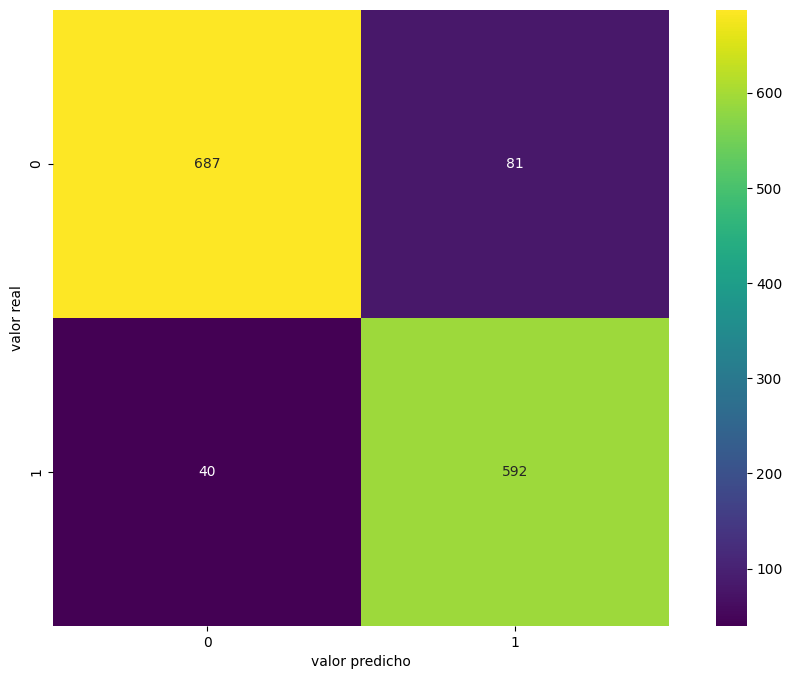

In [91]:
matriz_gradient = matriz_confusion(y_test, y_pred_gb_test, y_test.shape[0])
matriz_gradient

In [92]:
results_gradient = metricas(y_test, y_pred_gb_test, y_train, y_pred_gb_train, "Gradient")
df_all_results = pd.concat([df_all_results, results_gradient], axis = 0)
df_all_results

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.624286,0.616228,0.444620,0.516544,0.222235,test,Regresión logistica
1,0.611607,0.553641,0.420608,0.478042,0.177868,train,Regresión logistica
0,0.716429,0.705061,0.639241,0.670539,0.422682,test,Decission Tree II
1,0.764464,0.723477,0.717061,0.720255,0.516869,train,Decission Tree II
0,0.813571,0.811765,0.764241,0.787286,0.621629,test,Random Forest
1,0.906429,0.892007,0.885980,0.888983,0.808120,train,Random Forest
0,0.813571,0.805601,0.773734,0.789346,0.622268,test,KNN2
1,0.971964,1.000000,0.933699,0.965713,0.942048,train,KNN2
0,0.913571,0.879643,0.936709,0.907280,0.826493,test,Gradient
1,1.000000,1.000000,1.000000,1.000000,1.000000,train,Gradient


El mejor modelo es el gradient, de todos modos parece que tiene overfitting igual que el resto de mis modelos, esto deberia solucionarse revisando las columnas y quizas agrupando algunas de ellas y quizas haciendo el encoding de una manera diferente.